# Deep Gaze Vizualization

In [4]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob

In [6]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

### Load The Data

In [7]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [10]:
dg_table = summary[:,7,:]

In [13]:
dg = pd.DataFrame(data=dg_table, columns=metric, index=context)
dg

,nss,sim,ig,auc
all,1.007740,0.642767,3.110164,0.760010
person,1.091062,0.630332,2.745240,0.773875
no person,0.872670,0.662924,3.701723,0.737536
animal,1.028912,0.623571,2.988734,0.749271
electronic,0.857675,0.637034,3.812890,0.738996
sports,1.201838,0.623714,1.685864,0.784495


In [15]:
dg.columns.name='metric'
dg.index.name='context'

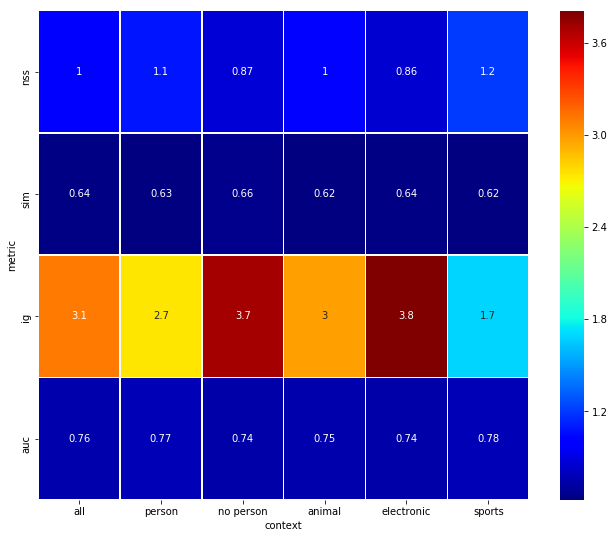

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dg.transpose(), annot=True, linewidths=.5, ax=ax, cmap='jet');

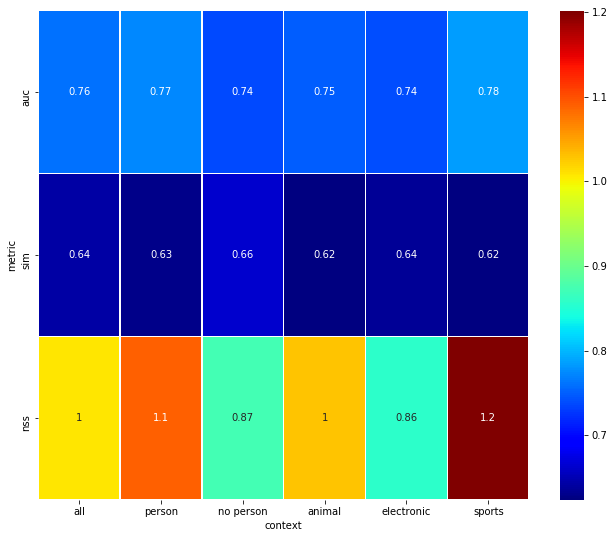

In [22]:
dg_no_ig = dg.transpose().loc[['auc', 'sim', 'nss']]
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dg_no_ig, annot=True, linewidths=.5, ax=ax, cmap='jet');